ch02...平均種子数\\( \lambda \\)は変化しない
ch03...平均種子数\\( \lambda \\)が変化する

ch03はポワソン回帰を用いて当てはめる。

このような統計モデルを一般化線形モデル(GLM)という


## 3.2 観測されたデータの概要を調べる
* y:種子数
* x:体サイズ
* f 施肥処理の値

In [2]:
from __future__ import division, print_function, absolute_import, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
 
d = pd.read_csv('data3a.csv')
 
#print(d)
print(d.info())
print('----')
print(d.describe())
print('----')
print(d.f.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
y    100 non-null int64
x    100 non-null float64
f    100 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB
None
----
                y           x
count  100.000000  100.000000
mean     7.830000   10.089100
std      2.624881    1.008049
min      2.000000    7.190000
25%      6.000000    9.427500
50%      8.000000   10.155000
75%     10.000000   10.685000
max     15.000000   12.400000
----
count     100
unique      2
top         T
freq       50
Name: f, dtype: object


## 3.3 統計モデリングの前にデータを図示する

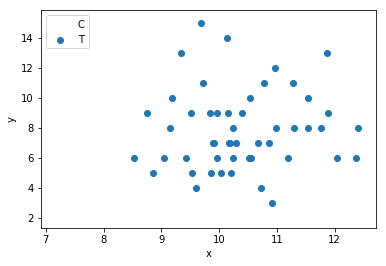

In [3]:
plt.scatter(d.x[d.f=='C'], d.y[d.f=='C'], label='C', facecolors='none')
plt.scatter(d.x[d.f=='T'], d.y[d.f=='T'], label='T')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

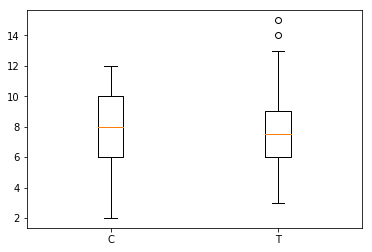

In [4]:
plt.boxplot([d.y[d.f=='C'], d.y[d.f=='T']], labels=['C', 'T'])
plt.show()

* 上記を見ると、体サイズxが増加するに連れ種子数yが増えているように見えるが、あまりはっきりしない。
* 白丸は施肥処理なし(C)黒丸は施肥処理あり(T)。施肥処理の有無は種子数に関係ないようにみえる。

## 3.4 ポアソン回帰の統計モデル
ポワソン分布は

$$ p(y|\lambda) = \frac{\lambda^yexp(-\lambda)}{y!} $$

個体ごとに平均種子数が変化するので、
ある個体\\( i \\)において種子数が\\( y_i \\)である確率\\( p(y_i|\lambda_i) \\)は

$$ p(y_i|\lambda_i) = \frac{\lambda_i^yexp(-\lambda_i)}{y_i!} $$

### 3.4.1 線形予測子と対数リンク関数

\\( \lambda_i \\)を説明変数\\( x_i \\)の関数として定義しなければならない。下記と仮定する。

$$ \lambda_i = exp(\beta_1 + \beta_2x_i) $$
$$ \rightarrow log\lambda_i = \beta_1 + \beta_2x_i $$

この時の右辺\\( \beta_1 + \beta_2x_i  \\)を**線形予測子**という。

(\\( \lambda_i =  \\))(線形予測子)となっている場合、左辺の「関数」は**リンク関数**と呼ばれる。

対数の場合は**対数リンク関数**と呼ばれ、数学的に都合の良い性質があるためポワソン分布の**正準リンク関数**という。

### 3.4.2 あてはめとあてはまりの良さ

ポワソン回帰とは、**観測データに対するポアソン分布を使った統計モデルのあてはめ(fitting)**

この統計モデルの対数尤度\\( logL \\)が最大になるパラメータ\\( \hat{\beta_1} \\)と\\( \hat{\beta_2} \\)の推定値を決めることでもある。

このモデルの対数尤度は

$$ logL(\beta_1,\beta_2) = \sum_ilog \frac{\lambda_i^yexp(-\lambda_i)}{y_i!} $$
となる。

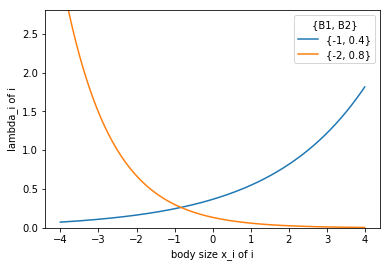

In [5]:
#ポワソン回帰のモデル
x = np.arange(-4, 4, 0.01)
 
fig = plt.figure()
ax = fig.add_subplot(111)
 
ax.plot(x, np.exp(-1 + 0.4 * x), label='{-1, 0.4}')
ax.plot(x, np.exp(-2 + -0.8 * x), label='{-2, 0.8}')
ax.legend(title='{B1, B2}')
ax.set_ylim(0, 2.8)
ax.set_xlabel('body size x_i of i')
ax.set_ylabel('lambda_i of i')
plt.show()

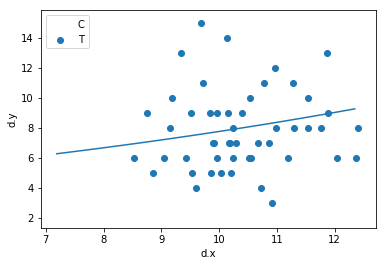

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
ax.scatter(d.x[d.f=='C'], d.y[d.f=='C'], label='C', facecolors='none')
ax.scatter(d.x[d.f=='T'], d.y[d.f=='T'], label='T')
 
xx = np.arange(min(d.x), max(d.x), (max(d.x) - min(d.x)) / 100)
ax.plot(xx, np.exp(1.29 + 0.0757 * xx))
 
ax.set_xlabel('d.x')
ax.set_ylabel('d.y')
ax.legend(loc='upper left')
plt.show()